In [214]:
import numpy as np
import pandas as pd
import openpyxl
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import json

In [215]:
wb = openpyxl.load_workbook('식습관DB_2024.xlsx')

df_dict  = {}
for sn in wb.sheetnames:
    data = wb[sn].values
    columns = next(data)[:]
    df = pd.DataFrame(data, columns=columns)
    if None in df.columns:
        df = df.drop(columns=[None])
    df_dict[sn[:4]] = df

In [216]:
df_dict['2023'].head(5)

,피험자번호,성별,연령(만),체중유형,거주유형,전공영역,요일,식사전스트레스지수,식사유형,식사위치,음식유형,가격,식사만족도,함께한사람,이동시간,식사시간,이동수단
0,B01,남성,19,표준체중,기숙사,공과대학,금,3,점심,기숙사,인스턴트,3000,약간만족,혼밥,없음,15분이내,없음
1,B01,남성,19,표준체중,기숙사,공과대학,금,2,저녁,북측,한식,6000,약간만족,다밥,15분이내,30분이내,도보
2,B01,남성,19,표준체중,기숙사,공과대학,토,1,점심,기숙사,인스턴트,4000,약간만족,혼밥,없음,15분이내,없음
3,B01,남성,19,표준체중,기숙사,공과대학,토,2,저녁,대전기타,한식,14000,만족,다밥,30분이내,30분이상,기타
4,B01,남성,19,표준체중,기숙사,공과대학,일,2,점심,기숙사,인스턴트,4000,약간만족,혼밥,없음,15분이내,없음


In [217]:
print(len(df_dict['2018']))
print(len(df_dict['2021']))
print(len(df_dict['2023']))
print(len(df_dict['2024']))
print(896 + 753 + 857 + 898)

896
753
857
898
3404


## 데이터 요약

### 성별

In [218]:
view = "성별"
tot_dict = defaultdict(int)
for key in df_dict.keys():
    df = df_dict[key]
    view_dict = defaultdict(int)
    df_group = df.groupby('피험자번호').first()[view]
    for i in df_group:
        view_dict[i] += 1
    print(f"{key} {view} 분포: ")
    pprint(json.loads(json.dumps(view_dict)))
    for key, value in view_dict.items():
        tot_dict[key] += value
print(f"전체 {view} 분포: ")
pprint(json.loads(json.dumps(tot_dict)))

2024 성별 분포: 
{'남성': 30, '여성': 13}
2023 성별 분포: 
{'남성': 31, '여성': 15}
2021 성별 분포: 
{'남성': 30, '여성': 9}
2018 성별 분포: 
{'남성': 35, '여성': 14}
전체 성별 분포: 
{'남성': 126, '여성': 51}


### 학번

In [219]:
view = "연령(만)"
age_tot_dict = defaultdict(int)
for key in df_dict.keys():
    df = df_dict[key]
    age_dict = defaultdict(int)
    ages = df.groupby('피험자번호').first()[view]
    for i in ages:
        age_dict[i] += 1
    print(f"{key} 나이 분포: ")
    pprint(json.loads(json.dumps(age_dict)))
    for key, value in age_dict.items():
        age_tot_dict[key] += value
print(f"전체 나이 분포: ")
pprint(json.loads(json.dumps(age_tot_dict)))

2024 나이 분포: 
{'19': 1, '20': 7, '21': 5, '22': 8, '23': 13, '24': 7, '25': 1, '27': 1}
2023 나이 분포: 
{'19': 3, '20': 4, '21': 14, '22': 11, '23': 4, '24': 8, '26': 2}
2021 나이 분포: 
{'18': 1, '20': 5, '21': 8, '22': 6, '23': 11, '24': 5, '25': 2, '26': 1}
2018 나이 분포: 
{'19': 1, '20': 13, '21': 15, '22': 5, '23': 7, '24': 6, '25': 2}
전체 나이 분포: 
{'18': 1,
 '19': 5,
 '20': 29,
 '21': 42,
 '22': 30,
 '23': 35,
 '24': 26,
 '25': 5,
 '26': 3,
 '27': 1}


### 거주 유형

In [220]:
view = "거주유형"
tot_dict = defaultdict(int)
for key in ['2023', '2024']:
    df = df_dict[key]
    view_dict = defaultdict(int)
    df_group = df.groupby('피험자번호').first()[view]
    for i in df_group:
        view_dict[i] += 1
    print(f"{key} {view} 분포: ")
    pprint(json.loads(json.dumps(view_dict)))
    for key, value in view_dict.items():
        tot_dict[key] += value
print(f"전체 {view} 분포: ")
pprint(json.loads(json.dumps(tot_dict)))

2023 거주유형 분포: 
{'기숙사': 31, '본가': 1, '자취': 14}
2024 거주유형 분포: 
{'기숙사': 32, '자취': 11}
전체 거주유형 분포: 
{'기숙사': 63, '본가': 1, '자취': 25}


### 체중 유형

In [221]:
view = "체중유형"
tot_dict = defaultdict(int)
for key in df_dict.keys():
    df = df_dict[key]
    view_dict = defaultdict(int)
    df_group = df.groupby('피험자번호').first()[view]
    for i in df_group:
        view_dict[i] += 1
    print(f"{key} {view} 분포: ")
    pprint(json.loads(json.dumps(view_dict)))
    for key, value in view_dict.items():
        tot_dict[key] += value
print(f"전체 {view} 분포: ")
pprint(json.loads(json.dumps(tot_dict)))

2024 체중유형 분포: 
{'과체중': 7, '저체중': 2, '표준체중': 34}
2023 체중유형 분포: 
{'과체중': 10, '저체중': 4, '표준체중': 32}
2021 체중유형 분포: 
{'과체중': 6, '저체중': 2, '표준체중': 31}
2018 체중유형 분포: 
{'과체중': 7, '저체중': 7, '표준체중': 35}
전체 체중유형 분포: 
{'과체중': 30, '저체중': 15, '표준체중': 132}


## 데이터 분석

### 아침 결식률의 변화

In [222]:
def get_breakfast(year):
    df = df_dict[year]
    df_g = df.groupby(['피험자번호'])
    breakfast = 0
    for _, group in df_g:
        breakfast += np.sum(group['식사유형']=='아침')
    return breakfast , len(df_g)

In [223]:
# 코로나-19 이전
bf_1, people_1 = get_breakfast('2018')
print(f"코로나-19 이전 아침 결식률: {100 * (1 - bf_1/(people_1*7)):.2f}")

# 코로나-19 중
bf_2, people_2 = get_breakfast('2021')
print(f"코로나-19 중 아침 결식률: {100 * (1 - bf_2/(people_2*7)):.2f}")

# 코로나-19 이후
bf_3, people_3 = get_breakfast('2023')
bf_4, people_4 = get_breakfast('2024')
print(f"코로나-19 이후 아침 결식률: {100 * (1 - (bf_3+bf_4)/((people_3+people_4)*7)):.2f}")

코로나-19 이전 아침 결식률: 81.34
코로나-19 중 아침 결식률: 74.36
코로나-19 이후 아침 결식률: 79.61


### 식사 위치의 변화

In [224]:
# 동측, 서측, 북측 => 학교내부
# 기숙사, 집 => 집
# 궁동, 대전기타, 둔산동, 대전외지역, 어은동 => 학교외부
place_set, place_map = set(), {}

for key in df_dict.keys():
    df = df_dict[key]
    place_set = place_set.union(set(df['식사위치']))

for place in place_set:
    if place in ['기숙사', '집']:
        place_map[place] = '집'
    elif place in ['동측', '서측', '북측']:
        place_map[place] = '학교내부'
    else:
        place_map[place] = '학교외부'

In [225]:
def get_places(year):
    df = df_dict[year]
    filt = df['식사유형'].isin(['아침', '점심', '저녁'])
    df = df[filt]
    df.loc[:, '식사위치'] = df['식사위치'].apply(lambda x: place_map[x])
    counts = dict(df['식사위치'].value_counts())

    return counts

In [226]:
# 코로나-19 이전
pcounts_1 = get_places('2018')
print(f"코로나-19 이전 식사 위치 분포: ")
pprint(pcounts_1)

# 코로나-19 중
pcounts_2 = get_places('2021')
print(f"코로나-19 중 식사 위치 분포: ")
pprint(pcounts_2)

# 코로나-19 이후
pcounts_3 = get_places('2023')
pcounts_4 = get_places('2024')
pcounts_5 = defaultdict(int)
for k, v in pcounts_3.items():
    pcounts_5[k] += v
for k, v in pcounts_4.items():
    pcounts_5[k] += v

print(f"코로나-19 이후 식사 위치 분포: ")
pprint(dict(pcounts_5))

코로나-19 이전 식사 위치 분포: 
{'집': 161, '학교내부': 228, '학교외부': 254}
코로나-19 중 식사 위치 분포: 
{'집': 335, '학교내부': 74, '학교외부': 152}
코로나-19 이후 식사 위치 분포: 
{'집': 497, '학교내부': 360, '학교외부': 342}


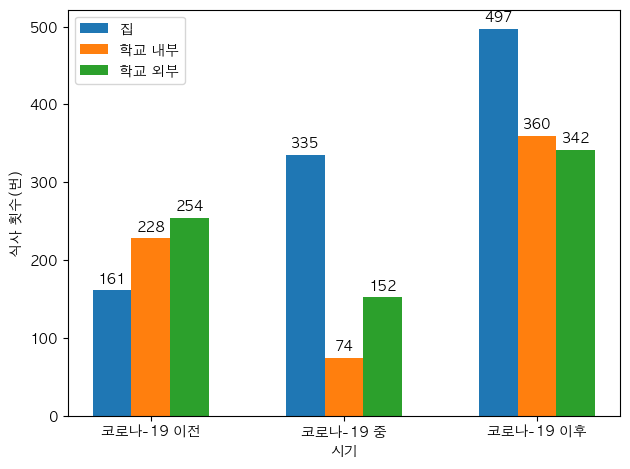

In [227]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
# 데이터 설정
labels = ['코로나-19 이전', '코로나-19 중', '코로나-19 이후']
house = [161, 335, 497]
school_inside = [228, 74, 360]
school_outside = [254, 152, 342]

x = np.arange(len(labels))  # x축 위치
width = 0.2  # 막대 폭

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, house, width, label='집')
rects2 = ax.bar(x, school_inside, width, label='학교 내부')
rects3 = ax.bar(x + width, school_outside, width, label='학교 외부')

# 레이블 및 제목 설정
ax.set_xlabel('시기')
ax.set_ylabel('식사 횟수(번)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

In [228]:
ratio_1 = {key: pcounts_1[key]/sum(pcounts_1.values())*100 for key in pcounts_1.keys()}
ratio_2 = {key: pcounts_2[key]/sum(pcounts_2.values())*100 for key in pcounts_2.keys()}
ratio_5 = {key: pcounts_5[key]/sum(pcounts_5.values())*100 for key in pcounts_5.keys()}
pprint(ratio_1)
pprint(ratio_2)
pprint(ratio_5)

{'집': 25.038880248833596, '학교내부': 35.45878693623639, '학교외부': 39.502332814930014}
{'집': 59.71479500891266, '학교내부': 13.19073083778966, '학교외부': 27.094474153297682}
{'집': 41.4512093411176, '학교내부': 30.025020850708923, '학교외부': 28.523769808173476}


### 식생활 만족도의 변화

#### 전반적인 식생활 만족도의 변화

In [229]:
def get_rates(year):
    df = df_dict[year]
    filt = df['식사유형'].isin(['아침', '점심', '저녁'])
    df = df[filt]
    if year == '2018':
        rate_map = {'만족': 3, '불만족': -3}
    else:
        rate_map = {'만족': 3, '약간만족': 1, '약간불만족': -1, '불만족': -3}
    df.loc[:, '식사만족도'] = df['식사만족도'].apply(lambda x: rate_map[x])
    counts = dict(df['식사만족도'].value_counts())

    return counts, round(np.mean(df['식사만족도']), 2)

In [230]:
# 코로나-19 이전
counts_1, rate_1 = get_rates('2018')
print(f"코로나-19 이전 식사 만족도: {rate_1}")
pprint(counts_1)

# 코로나-19 중
counts_2, rate_2 = get_rates('2021')
print(f"코로나-19 중 식사 만족도: {rate_2}")
pprint(counts_2)

# 코로나-19 이후
counts_3, rate_3 = get_rates('2023')
counts_4, rate_4 = get_rates('2024')
counts_5 = defaultdict(int)
rate, size = 0, 0
for k, v in counts_3.items():
    counts_5[k] += v
    size += v
    rate += k * v
for k, v in counts_4.items():
    counts_5[k] += v
    size += v
    rate += k * v

print(f"코로나-19 이후 식사 만족도: {round(rate/size, 2)}")
pprint(dict(counts_5))

코로나-19 이전 식사 만족도: 1.53
{-3: 158, 3: 485}
코로나-19 중 식사 만족도: 1.93
{-3: 9, -1: 42, 1: 190, 3: 320}
코로나-19 이후 식사 만족도: 1.83
{-3: 16, -1: 120, 1: 415, 3: 648}


#### 식생활 만족도 상관관계 분석

In [231]:
def get_correlation(year):
    df = df_dict[year]
    filt = df['식사유형'].isin(['아침', '점심', '저녁'])
    df = df[filt]
    df.loc[:, '식사위치'] = df['식사위치'].apply(lambda x: place_map[x])
    if year == '2018':
        rate_map = {'만족': 3, '불만족': -3}
    else:
        rate_map = {'만족': 3, '약간만족': 1, '약간불만족': -1, '불만족': -3}
    df.loc[:, '식사만족도'] = df['식사만족도'].apply(lambda x: rate_map[x])
    df_g = df.groupby(['피험자번호'])
    rate, place = [], []
    for i, group in df_g:
        rate.append(np.mean(group['식사만족도']))
        place.append(np.sum(group['식사위치']=='집')/len(group))
    
    return rate, place

def plot_scatter(rate1, place1, rate2, place2, rate3, place3):
    import matplotlib.pyplot as plt
    plt.rcParams['font.family'] ='AppleGothic'
    plt.rcParams['axes.unicode_minus'] =False
    coeff_1 = np.corrcoef(place1, rate1)[0, 1]
    coeff_2 = np.corrcoef(place2, rate2)[0, 1]
    coeff_3 = np.corrcoef(place3, rate3)[0, 1]
    # 플롯 그리기
    plt.scatter([100*i for i in place1], rate1, marker="o", label=f"코로나-19 이전")
    plt.scatter([100*i for i in place2], rate2, marker="s", label=f"코로나-19 중")
    plt.scatter([100*i for i in place3], rate3, marker="*", label=f"코로나-19 이후")
    plt.legend()
    plt.xlabel('집에서의 식사 비율(%)')
    plt.ylabel('식사만족도(점)')
    plt.xlim(-1,101)
    plt.ylim(-3.5,3.5)
    plt.grid(True)
    plt.show()

    return coeff_1, coeff_2, coeff_3

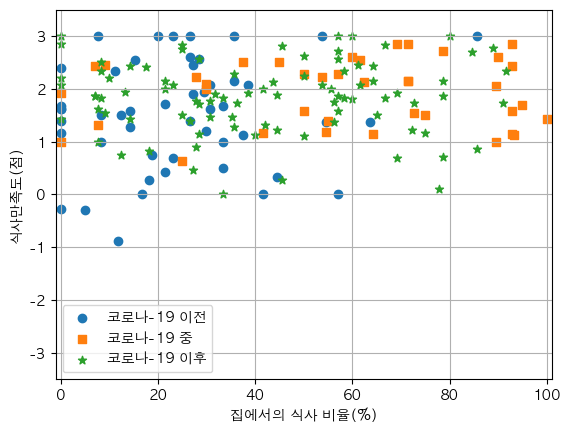

0.15, 0.05, 0.01


In [232]:
# 코로나-19 이전
rate_1, place_1 = get_correlation('2018')

# 코로나-19 중
rate_2, place_2 = get_correlation('2021')

# 코로나-19 이후
rate_3, place_3 = get_correlation('2023')
rate_4, place_4 = get_correlation('2024')

coeff1, coeff2, coeff3 = plot_scatter(rate_1, place_1, rate_2, place_2, rate_3+rate_4, place_3+place_4)

print(f"{coeff1:.2f}, {coeff2:.2f}, {coeff3:.2f}")